## Basic RamanomeSpec Workflow

In [168]:
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
sys.path.append("/Users/zijianleowang/Desktop/GitHub/RamanomeSpec/scripts")
import Raman_read, Raman_preprocess, Raman_find_polymer, Raman_stat, Raman_plot
import imp
import numpy as np
imp.reload(Raman_read)
imp.reload(Raman_preprocess)
imp.reload(Raman_find_polymer)
imp.reload(Raman_stat)
imp.reload(Raman_plot)

<module 'Raman_plot' from '/Users/zijianleowang/Desktop/GitHub/RamanomeSpec/scripts/Raman_plot.py'>

In [165]:
def main(pathin,pathout,dataloop,metalevel,peakwindow):
    speclist = Raman_read.read_txt(pathin,typpe='dir',dataloop=dataloop,metalevel=metalevel,outdir=pathout)
    n, d = speclist.shape
    stat = pd.DataFrame()
    for i in range(n):
        specp = speclist.iloc[i,:]
        pathouti = specp['abspathout']
        # save files
        if os.path.exists(pathouti): # remove exisiting files, since we need to save multiple times, to avoid inf saving
            os.remove(pathouti)
        
        X,Y,Y_BG = Raman_read.read_txt(specp['abspath'])
        if X is None and Y is None and Y_BG is None:
            print("No cell retrieved")
            continue
        else:
            Y,peaks,mol,basic_stat,phenotype_spec = Raman_preprocess.std_wf(X,Y,Y_BG,peakwindow)
        
        # plot figure & save
        idx = phenotype_spec.index.tolist()
        X = phenotype_spec['wavenumber']
        idx.remove('wavenumber')
        fig, ax = Raman_plot.viz_phenotype(phenotype_spec)
        Raman_read.Raman_save(pathouti.replace(".xlsx",".png"),fig,filetype='image')
        
        # for group member
        Raman_read.Raman_save(pathouti,peaks,"peak",typpe='single')
        Raman_read.Raman_save(pathouti,mol,"molecule",typpe='single')
        Raman_read.Raman_save(pathouti,phenotype_spec,typpe='series')

        stat = pd.concat([stat,basic_stat],axis=1)

        # for OPU analysis; the output data shape is n x d
        Raman_read.Raman_save(specp['abspathopu'].replace(".xlsx",".txt"),\
                              phenotype_spec['cell'],\
                              typpe='single',filetype='txt')


    stat.columns = speclist.index
    summary = pd.concat([speclist,stat.T],axis=1)
    Raman_read.Raman_save(pathout+'/summary.xlsx',summary,"summary",typpe='single')
    return summary

In [166]:
# Data from CROPPS Summer Maize Rhizosphere
imp.reload(Raman_preprocess)
pathin = "/Users/zijianleowang/Downloads/CROPPS_Summer2022_Maize/Maize"
peakwindow = np.arange(1,15)
pathout = "/Users/zijianleowang/Downloads/CROPPS_Summer2022_Maize/Maize_out"
metalevel = ['time points','repetitive']
dataloop = len(metalevel) # pathin contains 1 layers of directory; 1st layers represents time points; end dir contains multiple txt files from LabSpec6
summary = main(pathin,pathout,dataloop,metalevel,peakwindow=peakwindow)


/Users/zijianleowang/Downloads/CROPPS_Summer2022_Maize/Maize_out/Time 01 Maize 19/Drop2_01.xlsx has been saved
/Users/zijianleowang/Downloads/CROPPS_Summer2022_Maize/Maize_out/Time 01 Maize 19/Drop2_01.xlsx has been saved
/Users/zijianleowang/Downloads/CROPPS_Summer2022_Maize/Maize_out/Time 01 Maize 19/Drop2_01.xlsx has been saved
/Users/zijianleowang/Downloads/CROPPS_Summer2022_Maize/Maize_out/OPU/Time 01 Maize 19/Drop2_01.txt has been saved
/Users/zijianleowang/Downloads/CROPPS_Summer2022_Maize/Maize_out/Time 01 Maize 19/Drop1_01.xlsx has been saved
/Users/zijianleowang/Downloads/CROPPS_Summer2022_Maize/Maize_out/Time 01 Maize 19/Drop1_01.xlsx has been saved
/Users/zijianleowang/Downloads/CROPPS_Summer2022_Maize/Maize_out/Time 01 Maize 19/Drop1_01.xlsx has been saved
/Users/zijianleowang/Downloads/CROPPS_Summer2022_Maize/Maize_out/OPU/Time 01 Maize 19/Drop1_01.txt has been saved
/Users/zijianleowang/Downloads/CROPPS_Summer2022_Maize/Maize_out/Time 01 Maize 19/Drop3_01.xlsx has been s

In [ ]:
# Data from JRTP WWTPs with process techniques of PDNA
pathin = "/Users/zijianleowang/Desktop/Projects_in_Cornell/CROPPS/Field Sampling/Yuan_WWTPs/JRTP Raman txt" 
pathout = "/Users/zijianleowang/Desktop/Projects_in_Cornell/CROPPS/Field Sampling/Yuan_WWTPs/JRTP Raman txt out"
metalevel = ['treatments','time points','repetitive']
dataloop = len(metalevel) # pathin contains 2 layers of directory; 1st layer denotes experimental conditions; 2nd layers represents time points; end dir contains multiple txt files from LabSpec6
summary = main(pathin,pathout,dataloop,metalevel,np.arange(1,15))

- [x] Basics: get one table, containing n drops with meta info, all spec & index of clean, peaks info & assigned molecules; 

- [x] Medium: Basic calculation of cell not burnt %, cell %, PAO %

- [ ] Advanced analysis: ?

## visualize the stats in the summar

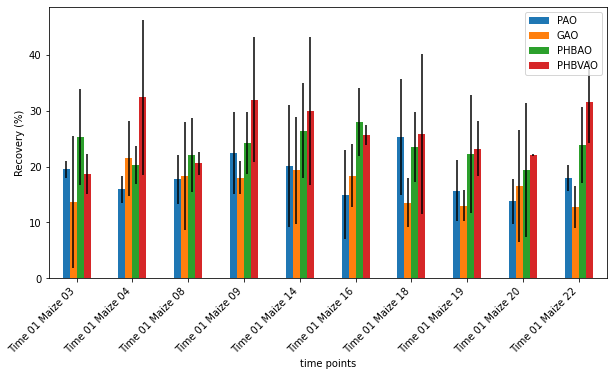

In [170]:
pathin = "/Users/zijianleowang/Downloads/CROPPS_Summer2022_Maize/Maize_out/summary.xlsx"
pathout = "/Users/zijianleowang/Downloads/CROPPS_Summer2022_Maize/Maize_out/summary.png"
summary = pd.read_excel(pathin,index_col=0)
fig, ax = Raman_plot.viz_summary(metalevel,summary,figsize=(10,5),droplabel=["cell recovery","cell"])
fig.savefig(pathout,bbox_inches='tight')